# Classifying images with VGG-16

[VGG-16](https://neurohive.io/en/popular-networks/vgg16/) is a convolutional neural network proposed by K. Simonyan and A. Zisserman of the University of Oxford in the paper [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556). The model achieved 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1,000 classes. VGG-16 required weeks of training using NVIDIA Titan GPUs and is freely available to researchers. It is also one of several pretrained CNNs available with Keras.

In this exercise, we load the VGG-16 network and initialize it with the ImageNet weights. Then we ask it to classify an image and show some of the feature maps generated by the network's convolutional layers.

![](Images/vgg-16.png)

# Load the CNN and classify an image

Loading VGG-16 and initializing it with imageNet weights requires just one line of code in Keras. Let's load the network and ask it to classify an image to see how it responds.

In [1]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
model.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

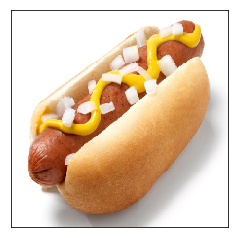

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image

x = image.load_img('food/test/hotdog/hot-dog-024.jpg', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [3]:
import numpy as np
from keras.applications.vgg16 import preprocess_input, decode_predictions

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = model.predict(x)
decode_predictions(y)

[[('n07697537', 'hotdog', 1.0),
  ('n07697313', 'cheeseburger', 2.3261401e-10),
  ('n07684084', 'French_loaf', 1.704605e-10),
  ('n07695742', 'pretzel', 3.5302337e-11),
  ('n07880968', 'burrito', 2.3293267e-11)]]

VGG-16 correctly identifies the image as one containing a hot dog. It's able to do so because "hotdog" is one of the ImageNet classes. Had we used a sushi image instead, the network would not have identified the image as one containing sushi because VGG-16 wasn't trained to recognize sushi.

## View feature maps generated from the image

We can visualize what the network's convolutional layers are doing by running an image through the network and using Matplotlib to plot the feature maps that it generates. We'll start by displaying the 64 feature maps generated in the `block1_conv1` layer.

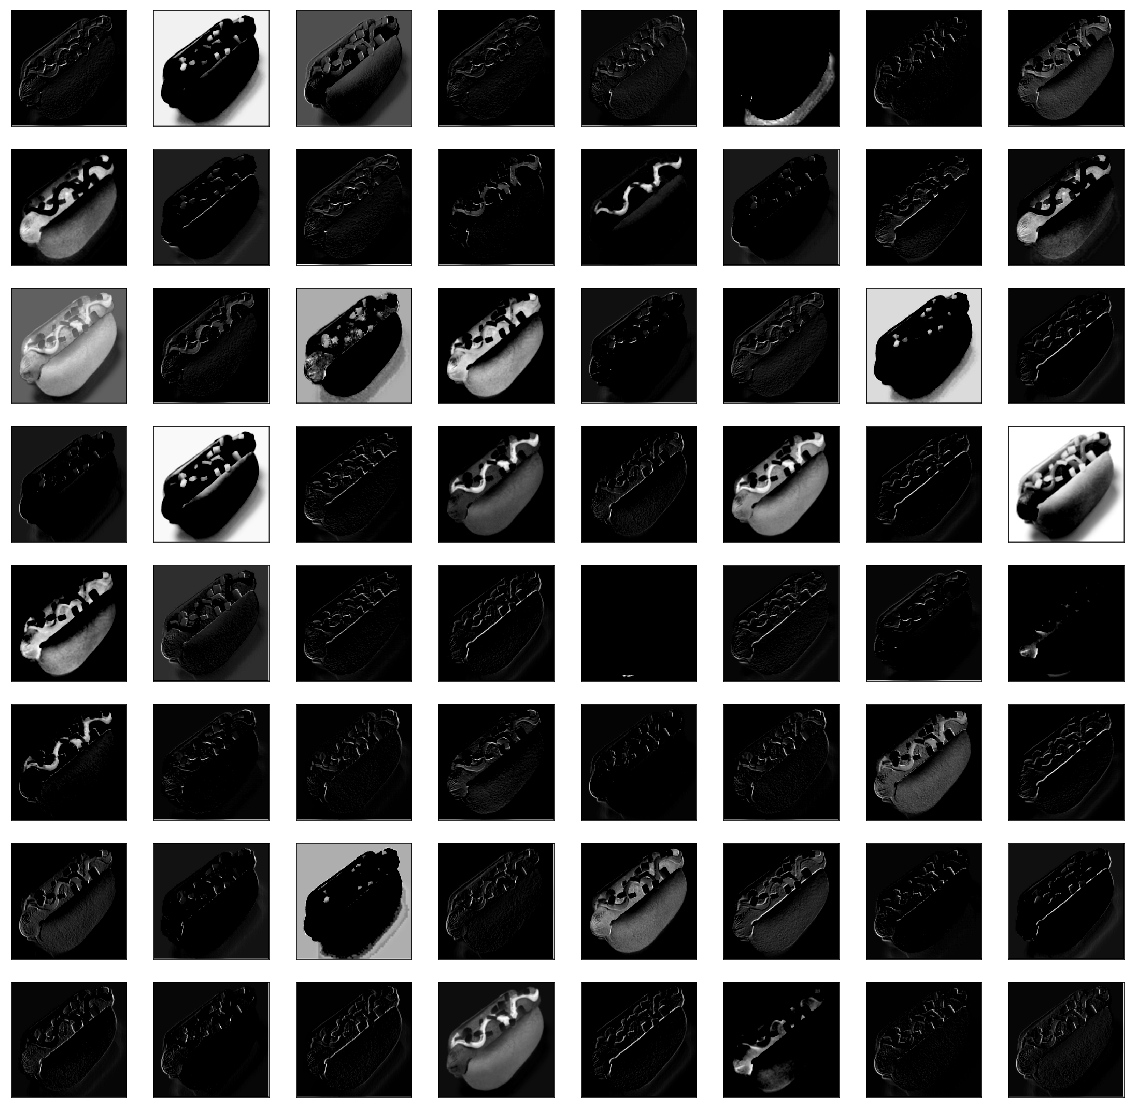

In [4]:
from keras import Model

def show_features(features):
    fig, axes = plt.subplots(8, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(features[0, :, :, i], cmap='gray')
        
partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
features = partial_model.predict(x)
show_features(features)

Next, show the first 64 (of 128) feature maps generated in the `block2_conv1` layer.

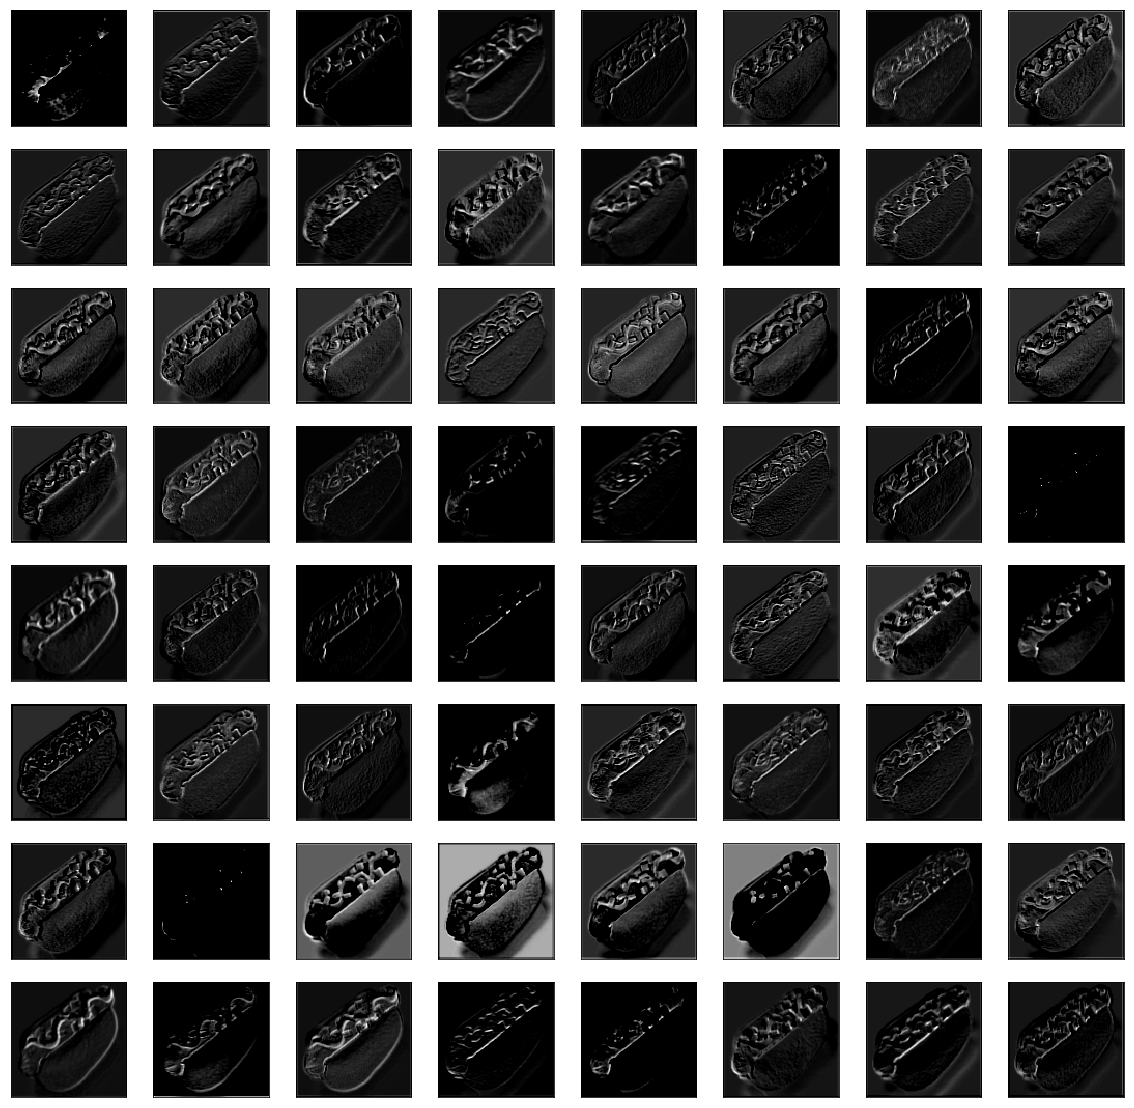

In [5]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[4].output)
features = partial_model.predict(x)
show_features(features)

Show the first 64 (of 256) feature maps generated in the `block3_conv1` layer.

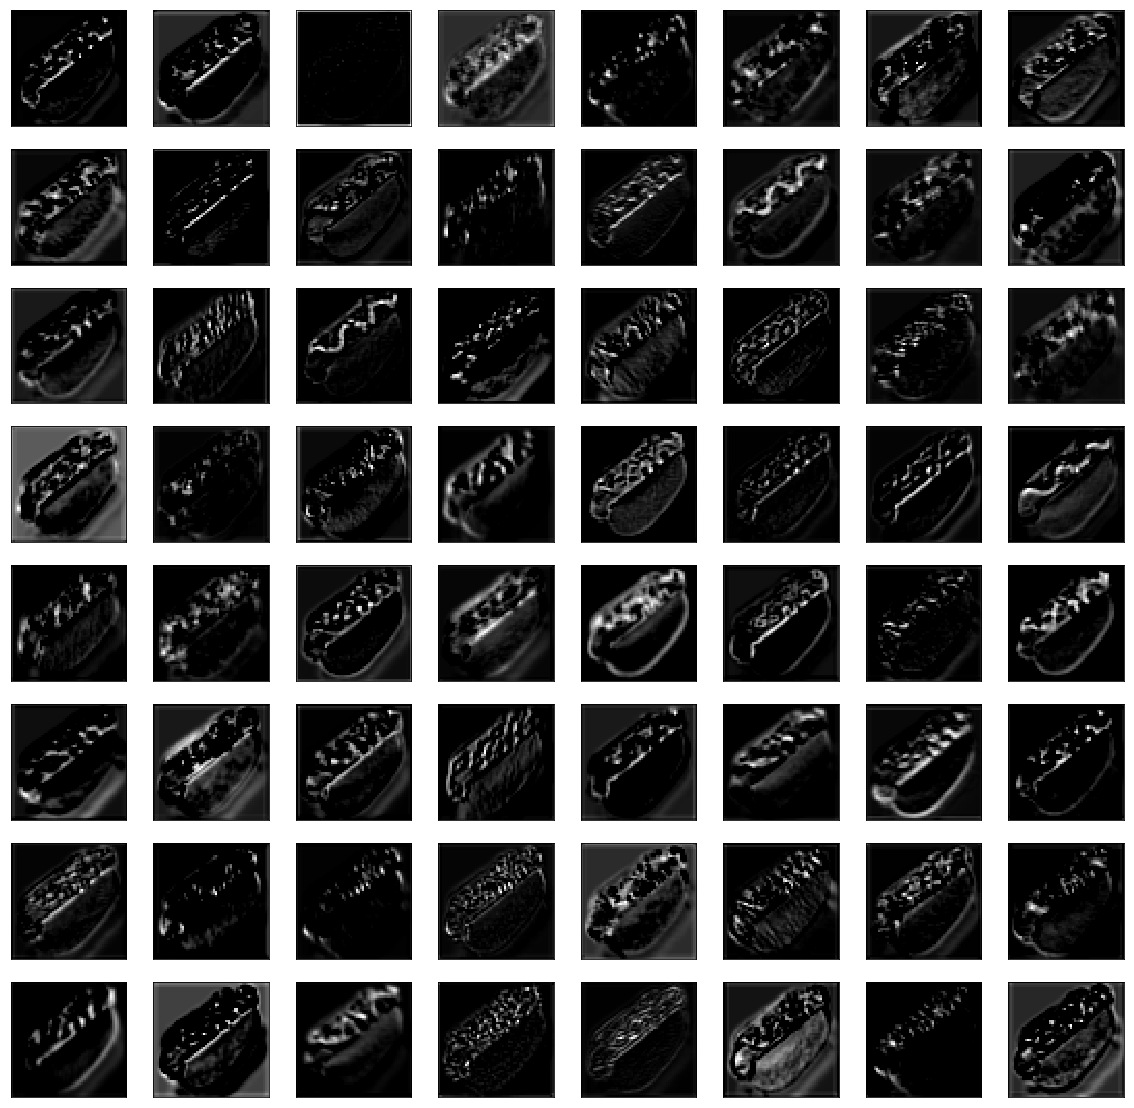

In [6]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[7].output)
features = partial_model.predict(x)
show_features(features)

Show the first 64 (of 512) feature maps generated in the `block4_conv1` layer.

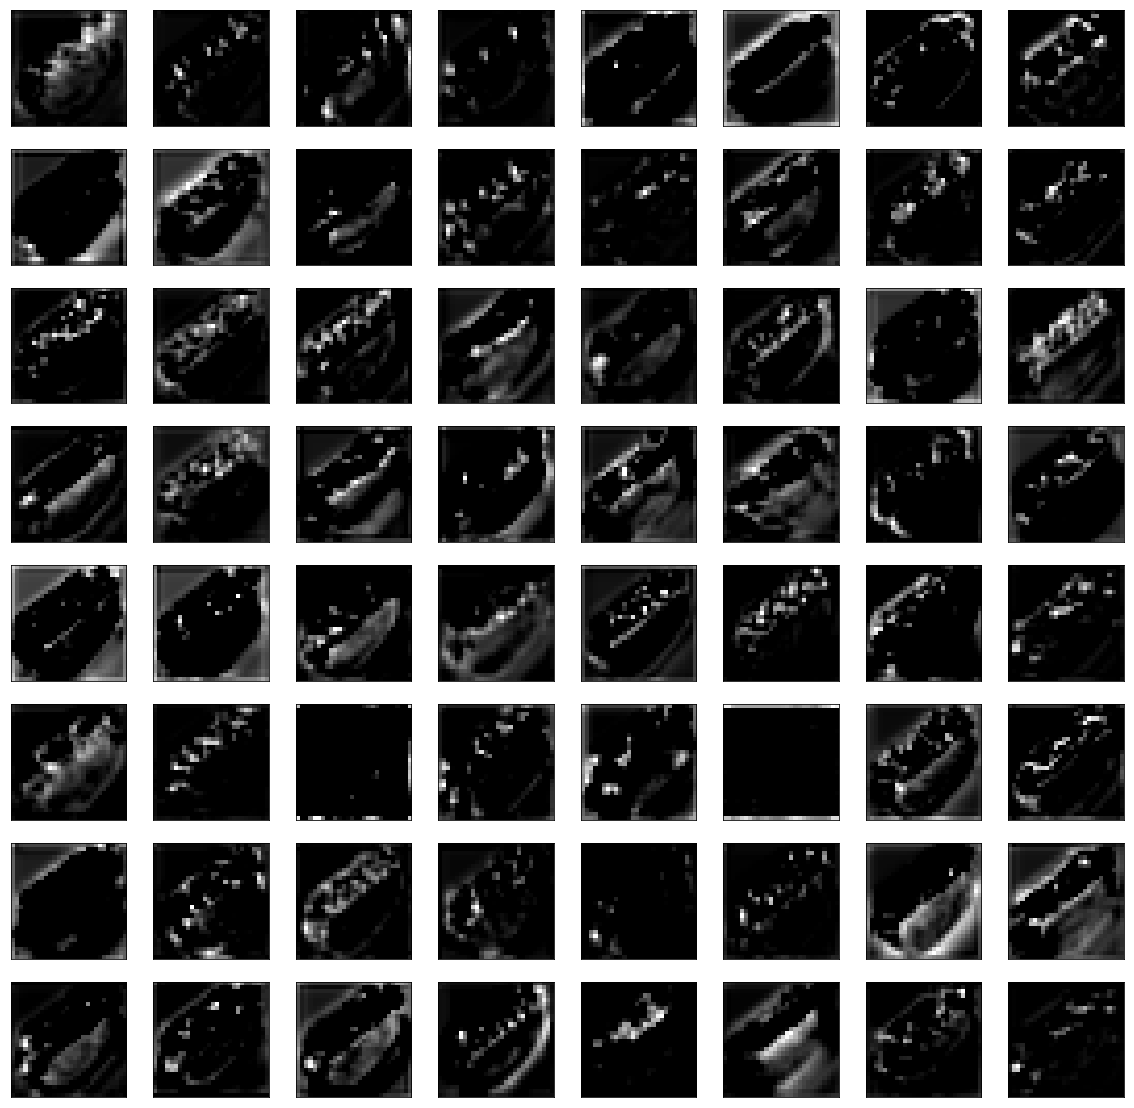

In [7]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[11].output)
features = partial_model.predict(x)
show_features(features)

Finally, show the first 64 (of 512) feature maps generated in the `block5_conv1` layer.

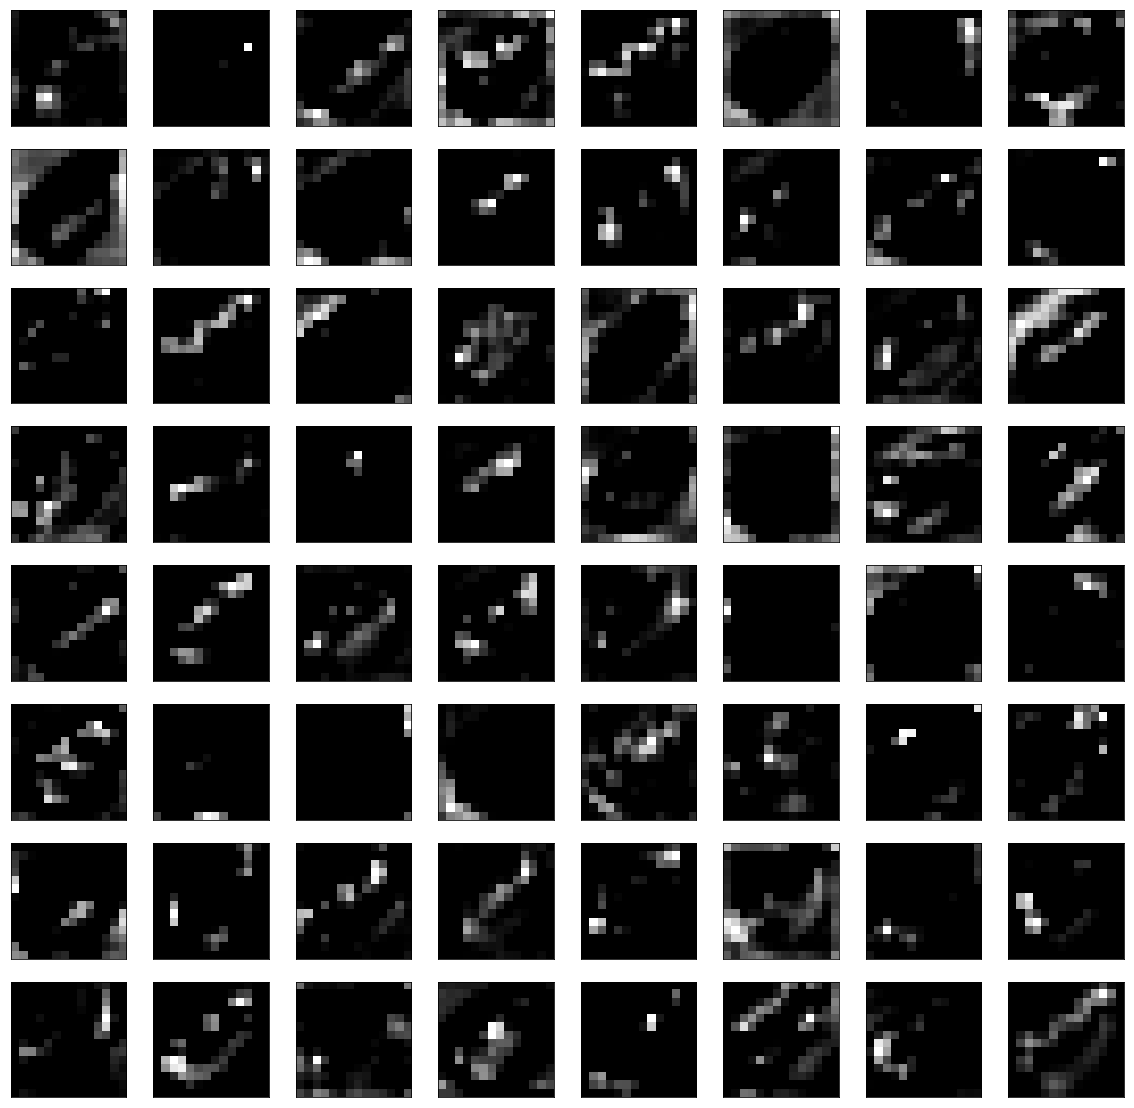

In [8]:
partial_model = Model(inputs=model.inputs, outputs=model.layers[15].output)
features = partial_model.predict(x)
show_features(features)